In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
import numpy as np
X = np.load('input_08_18_exp1.npy')
y = np.load('output.npy')
print(X.shape, y.shape)

(100000, 20) (100000,)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
def divide_data(data, train_rate, val_rate, test_rate):
    train = data[0 : int(len(data) * train_rate)]
    val = data[int(len(data) * train_rate) : int(len(data) * (train_rate + val_rate))]
    test = data[int(len(data) * (train_rate + val_rate)) : len(data)]
    return train, val, test

In [10]:
train_X, val_X, test_X = divide_data(X, 0.6, 0.2, 0.2)
train_y, val_y, test_y = divide_data(y, 0.6, 0.2, 0.2)
train_y.shape

(60000,)

In [12]:
model = load_model('model_exp1.h5')

In [13]:
test_loss, test_mae = model.evaluate(test_X, test_y)
print(test_loss, test_mae)

625/625 [==============================] - 6s 9ms/step - loss: 324.9201 - mean_absolute_error: 0.8844
324.92010498046875 0.8843801021575928


In [21]:
pred = model.predict(train_X).round(4)

1875/1875 [==============================] - 16s 9ms/step


In [23]:
df = pd.DataFrame()
df['real'] = list(train_y)
df['pred'] = list(pred)
df.head(60)

,real,pred
0,24.975,[24.9698]
1,0.015,[0.0956]
2,24.025,[23.9886]
3,0.015,[0.0946]
4,22.650,[22.9586]
5,0.010,[0.092]
6,22.000,[22.1067]
7,0.010,[0.095]
8,20.925,[21.1181]
9,0.010,[0.0921]


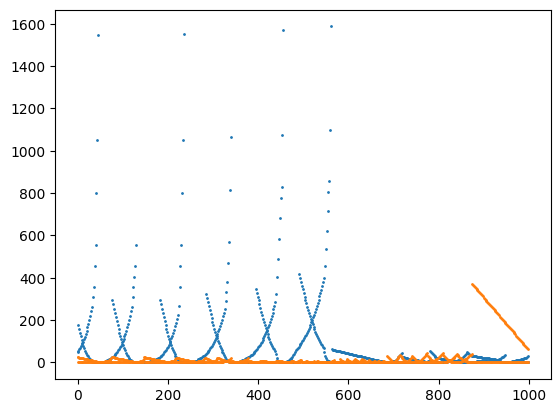

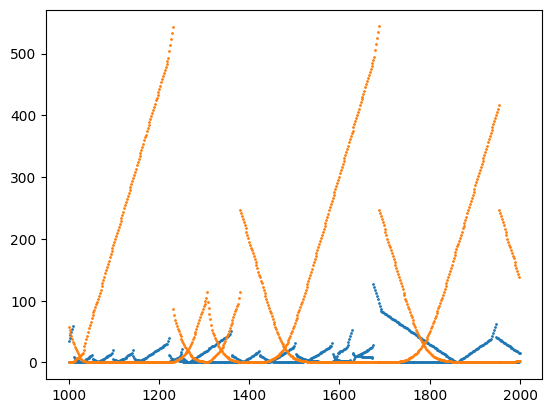

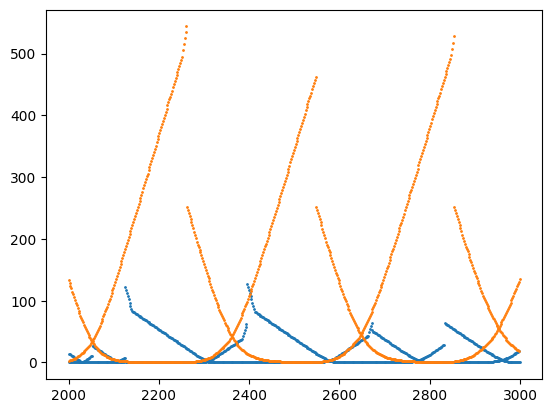

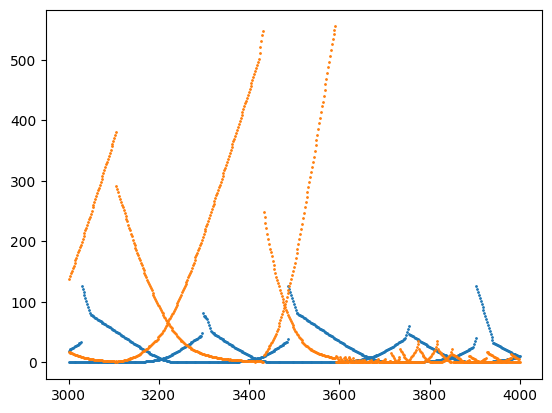

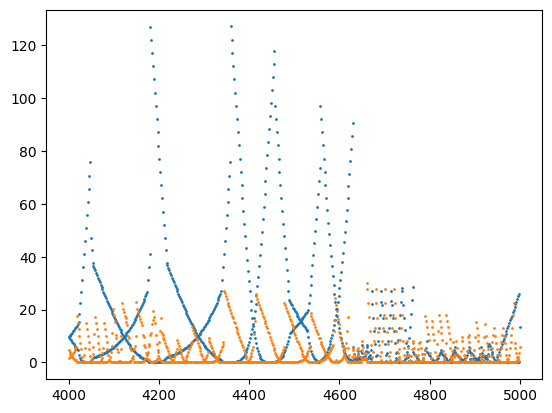

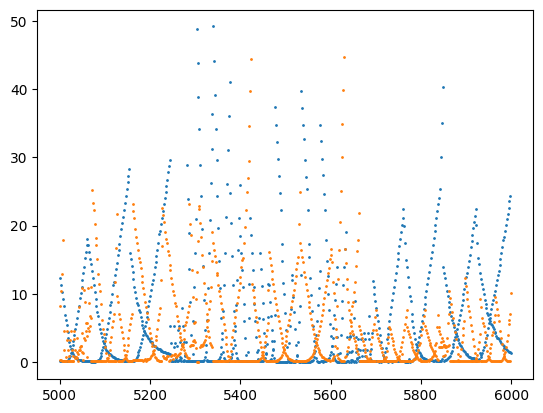

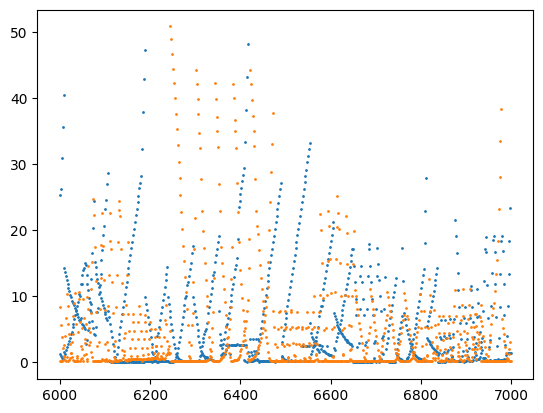

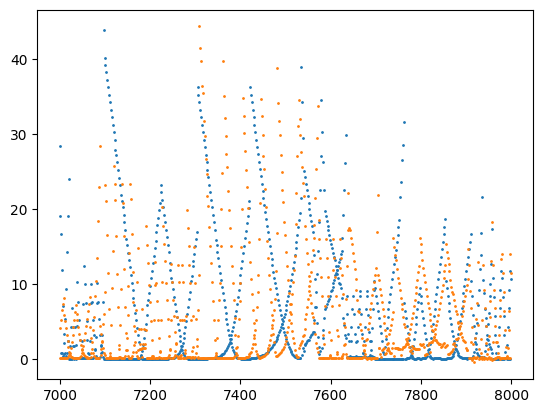

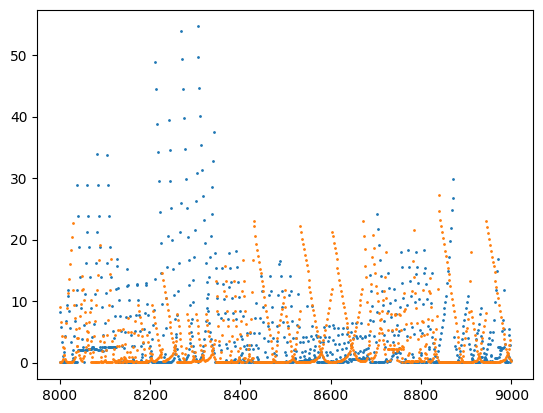

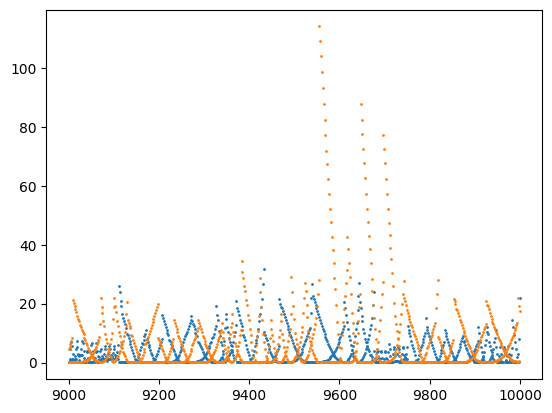

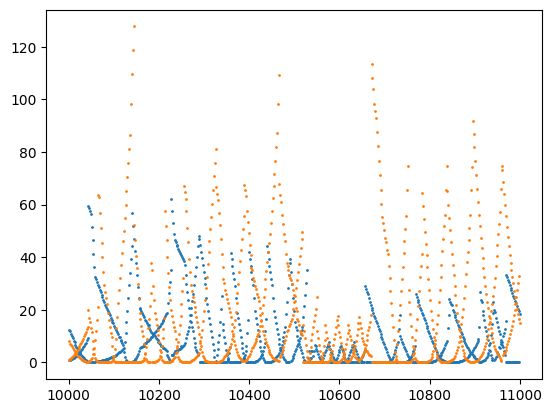

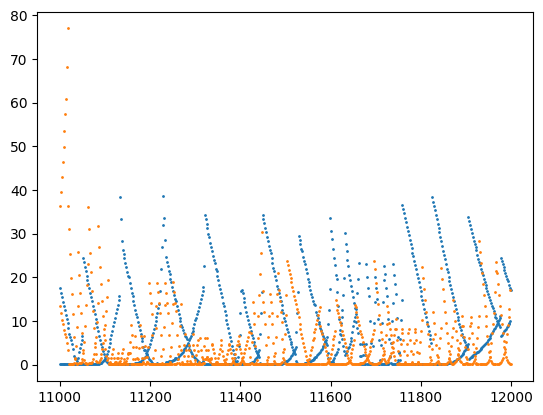

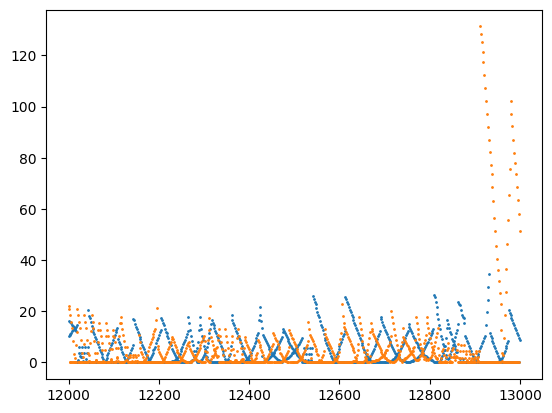

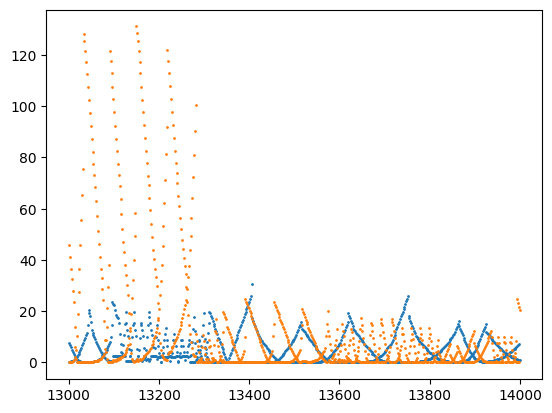

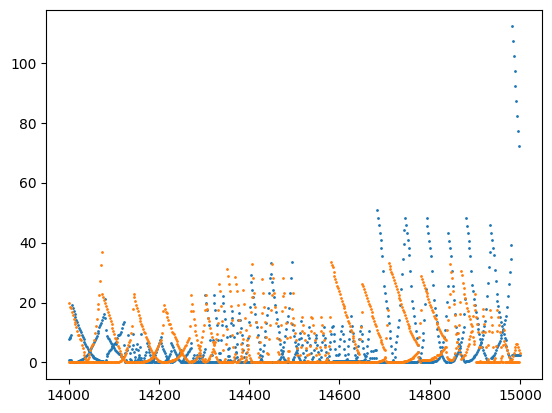

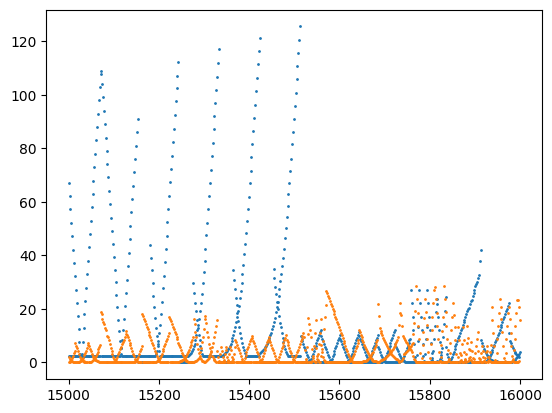

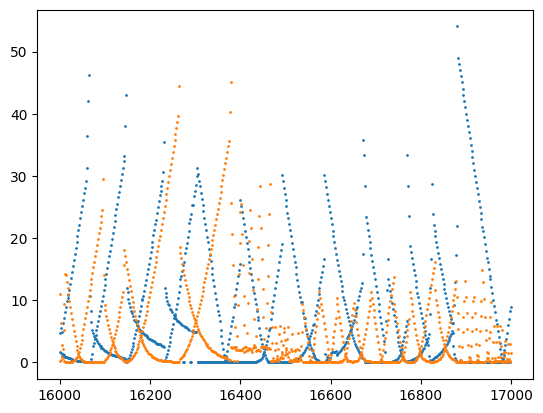

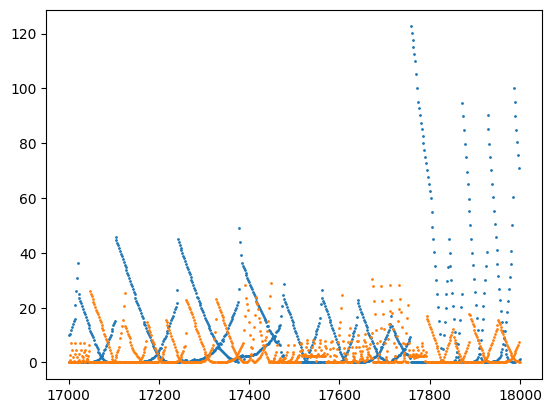

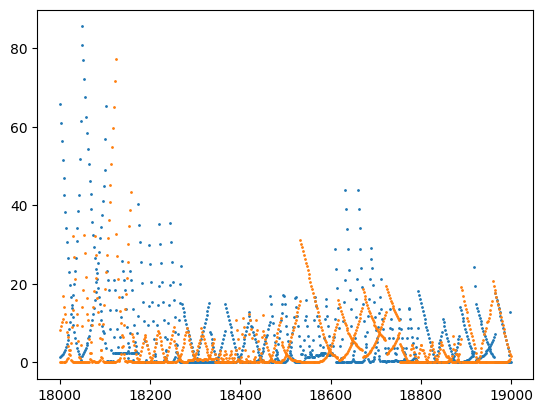

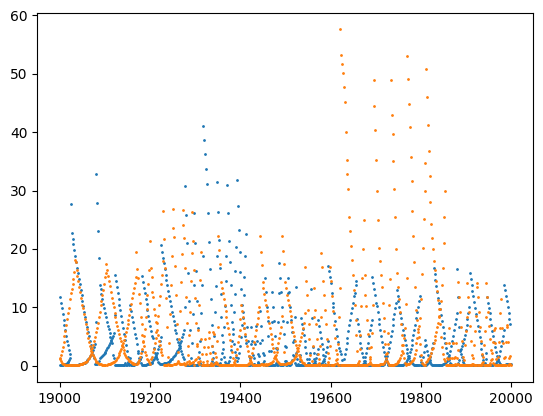

In [24]:
length = len(list(test_y))
for i in range(20):
    plt.figure()
    plt.scatter( [i for i in range(length // 20 * i, length // 20 * (i + 1))], test_y[length // 20 * i : length // 20 * (i + 1)], marker='o', s=1)
    plt.scatter( [i for i in range(length // 20 * i, length // 20 * (i + 1))], pred[length // 20 * i : length // 20 * (i + 1)], marker='o', s=1)